# Quick look at Impedance Data

## Data Cleanup

The cleanup is routine for a Maccor test output.

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("./ImpedanceEarlyTest.csv",sep="\t",index_col=0)
display(df)

,Cyc,Step,TestTime,StepTime,Amphr,Watthr,Amps,Volts,State,ACImpOhms
Rec,,,,,,,,,,
1,0,1,0d 00:00:0,0d 00:00:0,0.00000,0.00000,0.0000,4.13825,R,0.00000
2,0,1,0d 00:01:0,0d 00:01:0,0.00000,0.00000,0.0000,4.15023,R,0.00000
3,1,4,0d 00:01:0,0d 00:00:0,0.00000,0.00000,0.0005,4.14687,P,2.26676
4,1,5,0d 00:01:0.00999999977648258,0d 00:00:0.00999999977648258,0.00000,0.00000,0.0000,4.14977,D,2.26676
5,1,5,0d 00:02:0.00999999977648258,0d 00:01:0.00999999977648258,0.00001,0.00003,0.0005,4.14328,D,2.26676
...,...,...,...,...,...,...,...,...,...,...
4126,2,5,2d 20:36:10.0600004196167,1d 04:27:0.00999999977648258,0.01423,0.05558,0.0005,3.74441,D,2.20293
4127,2,5,2d 20:37:10.0600004196167,1d 04:28:0.00999999977648258,0.01423,0.05561,0.0005,3.74441,D,2.20293
4128,2,5,2d 20:38:10.0600004196167,1d 04:29:0.00999999977648258,0.01424,0.05564,0.0005,3.74441,D,2.20293


In [41]:
df1 = df.query('State=="D" and Cyc==1').copy()
display(df1)

,Cyc,Step,TestTime,StepTime,Amphr,Watthr,Amps,Volts,State,ACImpOhms
Rec,,,,,,,,,,
4,1,5,0d 00:01:0.00999999977648258,0d 00:00:0.00999999977648258,0.00000,0.00000,0.0000,4.14977,D,2.26676
5,1,5,0d 00:02:0.00999999977648258,0d 00:01:0.00999999977648258,0.00001,0.00003,0.0005,4.14328,D,2.26676
6,1,5,0d 00:03:0.00999999977648258,0d 00:02:0.00999999977648258,0.00002,0.00007,0.0005,4.14206,D,2.26676
7,1,5,0d 00:04:0.00999999977648258,0d 00:03:0.00999999977648258,0.00002,0.00010,0.0005,4.14115,D,2.26676
8,1,5,0d 00:05:0.00999999977648258,0d 00:04:0.00999999977648258,0.00003,0.00014,0.0005,4.14054,D,2.26676
...,...,...,...,...,...,...,...,...,...,...
2246,1,5,1d 13:23:0.00999999977648258,1d 13:22:0.00999999977648258,0.01868,0.07162,0.0005,3.09773,D,2.26676
2247,1,5,1d 13:24:0.00999999977648258,1d 13:23:0.00999999977648258,0.01869,0.07164,0.0005,3.07538,D,2.26676
2248,1,5,1d 13:25:0.00999999977648258,1d 13:24:0.00999999977648258,0.01870,0.07167,0.0005,3.05005,D,2.26676


<AxesSubplot:xlabel='Rec'>

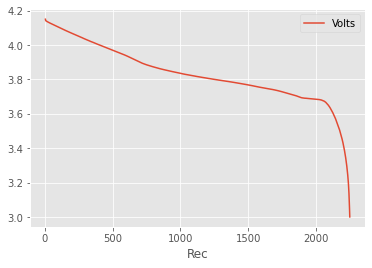

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
df1.plot(y='Volts')

## Discharge Curve

The discharge goes for about 37 hours, which I would expect for a battery with this level of charge.

In [43]:
Q=df1.Amphr.max()
print(f'The empirical capacity of this battery was {1000*Q:.2f} mAh.')
print(f'This battery had sat on my desk for a number of months,\nso its actual capacity at the start of test was unknown to me.')

The empirical capacity of this battery was 18.71 mAh.
This battery had sat on my desk for a number of months,
so its actual capacity at the start of test was unknown to me.


Text(0, 0.5, 'VBAT(V)')

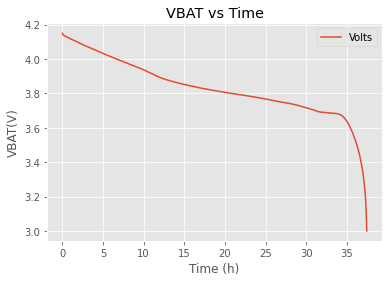

In [44]:
def cleanup(x):
    d =int(x[:2].replace("d",""))
    m=sum([ float(z[0])*float(z[1]) for z in zip(x[3:].split(':'),[60,1,1/60])])
    return (d*1440+m)/60

df1['Temp']=df1['StepTime'].apply(cleanup)
ax=df1.plot(x='Temp',y='Volts',title="VBAT vs Time")   
ax.set_xlabel('Time (h)')
ax.set_ylabel('VBAT(V)')



## SOC Calculation

The SOC looks as I would expect for a Z22A. The capacity at start is a bit below what I would expect for a fully charged unit, but this battery had been in storage for several months.

Text(0, 0.5, 'SOC (%)')

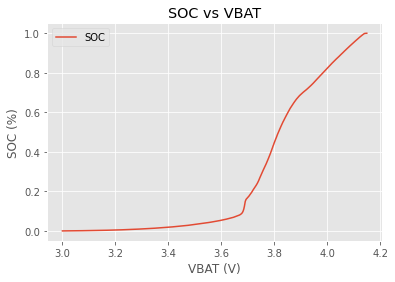

In [45]:
 df1['SOC']=1-df1['Temp']*0.0005/Q
ax=df1.plot(x='Volts',y='SOC',title="SOC vs VBAT")   
ax.set_xlabel('VBAT (V)')
ax.set_ylabel('SOC (%)')